# Wczytanie i wstępna obróbka danych

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

Wczytujemy pliki:

In [22]:
monet_dir = "monet_jpg"

monet_imgs = [fn for fn in os.listdir(monet_dir) if fn.endswith('.jpg')]
print(f"Ilość obrazów: {len(monet_imgs)}")

Ilość obrazów: 300


Zobaczmy kilka losowo wybranych obrazów Monet'a:

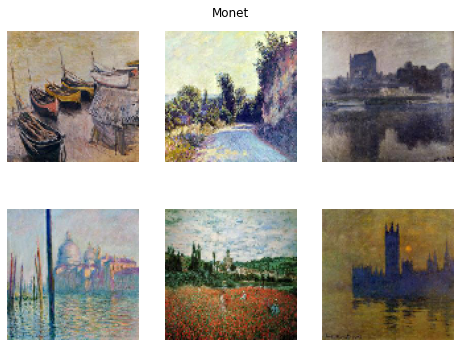

In [21]:
select_few = np.random.choice(monet_imgs, 6, replace = False)

fig = plt.figure(figsize = (8,6))
plt.title("Monet")
plt.axis('off')
for i in range(6):
    fp = f"{monet_dir}/{select_few[i]}"
    ax = fig.add_subplot(2, 3, i+1)
    fn = image.load_img(fp, target_size = (100,100), color_mode="rgb")
    plt.imshow(fn)
    plt.axis('off')
plt.show()

## Obrazy eksperymentalne:

Najpierw zamieniamy obrazy na macierze:

In [47]:
def img2np(path, list_of_filename, size = (256, 256)):
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'rgb')
        img_ts = image.img_to_array(current_image)
        img_ts = [img_ts.ravel()]
        try:
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            full_mat = img_ts
    return full_mat

monet_matrix = img2np(f"{monet_dir}/", monet_imgs)

Teraz policzymy obraz średni, minimalny i maksymalny licząc poszczególne wartości dla każdego pixela:

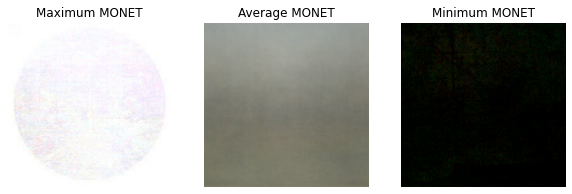

In [58]:
def min_mean_max_img(full_mat, title, size = (256, 256, 3)):
    fig = plt.figure(figsize = (10,6))
    max_img = np.max(full_mat, axis = 0)
    max_img = max_img.reshape(size)
    mean_img = np.mean(full_mat, axis = 0)
    mean_img = mean_img.reshape(size)
    min_img = np.min(full_mat, axis = 0)
    min_img = min_img.reshape(size)
    ax = fig.add_subplot(1, 3, 1)
    plt.imshow(max_img.astype(np.uint8), vmin=0, vmax=255)
    plt.title(f'Maximum {title}')
    plt.axis('off')
    ax = fig.add_subplot(1, 3, 2)
    plt.imshow(mean_img.astype(np.uint8), vmin=0, vmax=255)
    plt.title(f'Average {title}')
    plt.axis('off')
    ax = fig.add_subplot(1, 3, 3)
    plt.imshow(min_img.astype(np.uint8), vmin=0, vmax=255)
    plt.title(f'Minimum {title}')
    plt.axis('off')
    plt.show()
    return mean_img

monet_mean = min_mean_max_img(monet_matrix, 'MONET')

Źródła:
* https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2